In [31]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import pickle
from scipy.stats import mode
import time

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
####### CLASSIFIER CLASS #############################

class knearest(object):
	"""docstring for knearest"""
	def __init__(self):
		pass

	def train(self, X, y):
		self.X_train = X
		self.y_train = y

	def predict(self, X, k=1, num_loops = 0):
		if num_loops == 0:
			dists = self.compute_dists_no_loop(X)
		elif num_loops == 1:
			dists = self.compute_dists_one_loop(X)
		elif num_loops == 2:
			dists = self.compute_dists_two_loops(X)

		return self.predict_labels(dists, k=k)

	def compute_dists_two_loops(self, X):
		num_train = self.X_train.shape[0]
		num_test = X.shape[0]
		dists = np.zeros((num_test, num_train))
		for j in range(self.X_train.shape[0]):
			for i in range(X.shape[0]):
				dists[i][j] = (np.sum((self.X_train[j] - X[i])**2))

		return dists

	def compute_dists_one_loop(self, X):
		num_train = self.X_train.shape[0]
		num_test = X.shape[0]
		dists = np.zeros((num_test, num_train))

		for i in range(num_test):
			dists[i,:] = np.sum((X[i,:] - self.X_train)**2, axis=1)

		return dists

	def compute_dists_no_loop(self, X):
		F = np.sum(self.X_train**2, axis = 1)
		G = np.sum(X**2, axis = 1)
		dists = np.zeros((X.shape[0], self.X_train.shape[0]))
		#print(G)
		F = np.tile(F.T, (X.shape[0],1))
		G = np.tile(G.T, (self.X_train.shape[0],1)).T

		#print("G : ", G.shape)
		#print("F : ", F.shape)
		dists = F + G - 2*np.dot(X, self.X_train.T)

		return dists

	def predict_labels(self, dists, k=1):
		num_test = dists.shape[0]

		y_test = np.zeros(num_test)
		dist_sorted_arg = np.argsort(dists)
		classes_array = np.zeros(k)
		for i in range(num_test):
			for j in range(k):
				#print('ERR " ', dist_sorted_arg[i][j])
				classes_array[j] = self.y_train[dist_sorted_arg[i][j]]

			y_test[i] = mode(classes_array)[0][0]

		return y_test

####### CLASSIFIER CLASS ##############################

In [6]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Testing data shape: ', X_test.shape)
print('Testing labels shape: ', y_test.shape)

######################################################
# classes = ['plane', 'car', 'cat', 'deer']
# num_classes = len(classes)
# samples_per_class = 5
# for y, cls in enumerate(classes):
# 	ids = np.flatnonzero(y_train == y)
# 	ids = np.random.choice(ids, samples_per_class, replace=False)

# 	for i, idxs in enumerate(ids):
# 		plt_idx = i*num_classes+y+1
# 		plt.subplot(samples_per_class, num_classes, plt_idx)
# 		plt.imshow(X_train[idxs].astype('uint8'))
# 		plt.axis('off')
# 		if i == 0:
# 			plt.title(cls)

# plt.show()
#######################################################

('Training data shape: ', (50000, 32, 32, 3))
('Training labels shape: ', (50000,))
('Testing data shape: ', (10000, 32, 32, 3))
('Testing labels shape: ', (10000,))


In [8]:
num_training = 5000
num_test = 500

X_train = X_train[0:num_training]
y_train = y_train[0:num_training]

X_test = X_test[0:num_test]
y_test = y_test[0:num_test]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print(X_train.shape, X_test.shape)

classifier = knearest()
classifier.train(X_train, y_train)

Generate_Dists = True

if Generate_Dists:
	y_pred = classifier.predict(X_test, 5, 2)
	start = time.time()
	dists = classifier.compute_dists_two_loops(X_test)
	end = time.time()
	print("Two loops takes ", end - start)
	y_pred_one = classifier.predict(X_test, 5, 1)
	dists_one = classifier.compute_dists_one_loop(X_test)
	end2 = time.time()
	print("One loop takes ", end2 - end)
	y_pred_zero = classifier.predict(X_test, 5, 0)
	dists_zero = classifier.compute_dists_no_loop(X_test)
	end3 = time.time()
	print("Zeroloops takes ", end3 - end2)
	pickle.dump(dists, open('dists.p', 'wb'))
	pickle.dump(y_pred, open('y_pred_two_loops.p', 'wb'))
	pickle.dump(dists_one, open('dists_one.p', 'wb'))
	pickle.dump(y_pred_one, open('y_pred_one_loops.p', 'wb'))
	pickle.dump(dists_zero, open('dists_zero.p', 'wb'))
	pickle.dump(y_pred_zero, open('y_pred_zero_loops.p', 'wb'))
else:
	dists = pickle.load(open('dists.p', 'rb'))
	y_pred = pickle.load(open('y_pred_two_loops.p', 'rb'))
	dists_one = pickle.load(open('dists_one.p', 'rb'))
	y_pred_one = pickle.load(open('y_pred_one_loops.p', 'rb'))
	dists_zero = pickle.load(open('dists_zero.p', 'rb'))
	y_pred_zero = pickle.load(open('y_pred_zero_loops.p', 'rb'))


# print(y_pred.shape)
# print(dists.shape)

# plt.subplot(3,1,1)
# plt.imshow(dists_zero, interpolation='none')
# plt.subplot(3,1,2)
# plt.imshow(dists_one, interpolation='none')
# plt.subplot(3,1,3)
# plt.imshow(dists, interpolation='none')
# plt.show()

# num_correct = np.sum(y_pred == y_test)
# accuracy = float(num_correct) / y_test.shape[0]

# print("Accuracy : ", accuracy)
# print("Got %d / %d correct" % (num_correct, num_test))

((5000, 3072), (500, 3072))
('Two loops takes ', 28.696277856826782)
('One loop takes ', 114.78560209274292)
('Zeroloops takes ', 0.5893490314483643)


In [ ]:
num_folds = 5
k_choices = [1,3,5,8,10,12,15,20,50,100]


X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

print(y_train_folds[0].shape)

k_to_accuracies = {}

for k in k_choices:
    acc = []
    for i in range(num_folds):
        classifier = knearest()
        X_train_cv = np.concatenate([arr for j, arr in enumerate(X_train_folds) if j != i])
        y_train_cv = np.concatenate([arr for j, arr in enumerate(y_train_folds) if j != i])

        X_test_cv = X_train_folds[i]
        y_test_cv = y_train_folds[i]

        #print(i, X_train_cv.shape, y_train_cv.shape)
        #print(i, X_test_cv.shape, y_test_cv.shape)
        
        classifier.train(X_train_cv, y_train_cv)
        y_pred_cv = classifier.predict(X_test_cv, k, 0)

        num_correct = np.sum(y_pred_cv == y_test_cv)
        print(k, num_correct)
        
        acc.append(float(num_correct)/y_test_cv.shape[0])
    k_to_accuracies[k] = acc

In [28]:
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print ('k = %d, accuracy = %f' % (int(k), accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

[1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
[ 0.2656  0.2496  0.2732  0.276   0.2802  0.2794  0.275   0.279   0.2744
  0.2616]
[ 0.00688767  0.00993177  0.01505191  0.00944458  0.01012719  0.01125344
  0.01252198  0.00501996  0.00786384  0.00523832]


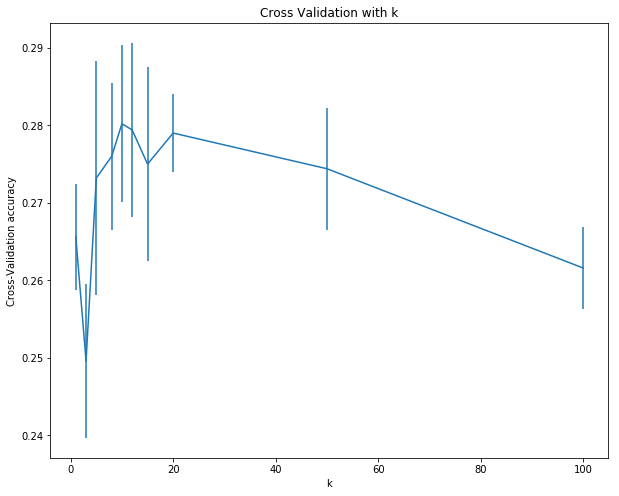

In [34]:
acc_means = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
acc_stds = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])

print(k_choices)
print(acc_means)
print(acc_stds)
plt.errorbar(k_choices, acc_means, yerr = acc_stds)
plt.title('Cross Validation with k')
plt.xlabel('k')
plt.ylabel('Cross-Validation accuracy')
plt.show()